# Perdiction of House Price in Tehran

You can find the description of the data set in [here](https://www.kaggle.com/mokar2001/house-price-tehran-iran)

First, we should import libraries that we need for our analysis.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

Now I'm changing the format of the display option in pandas. If I don't do this, I will see large Numbers in scientific form. Also, Since we will predict house prices and deal with large numbers, I chose to display zero decimals; it is easier to work with.

In [2]:
#pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.float_format = "{:,.0f}".format
#pd.reset_option('display.float_format')

Let's Explore the data and see what it looks like:

In [3]:
df = pd.read_csv("01- House_Price_Data.csv")
df.head(9)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,"1,850,000,000","61,667"
1,60,1,True,True,True,Shahran,"1,850,000,000","61,667"
2,79,2,True,True,True,Pardis,"550,000,000","18,333"
3,95,2,True,True,True,Shahrake Qods,"902,500,000","30,083"
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000","233,333"
5,70,2,True,True,False,North Program Organization,"2,050,000,000","68,333"
6,87,2,True,True,True,Pardis,"600,000,000","20,000"
7,59,1,True,True,True,Shahran,"2,150,000,000","71,667"
8,54,2,True,True,False,Andisheh,"493,000,000","16,433"


In [4]:
df.describe()

,Room,Price,Price(USD)
count,"3,479","3,479","3,479"
mean,2,"5,359,022,711","178,634"
std,1,"8,099,934,524","269,998"
min,0,"3,600,000",120
25%,2,"1,418,250,000","47,275"
50%,2,"2,900,000,000","96,667"
75%,2,"6,000,000,000","200,000"
max,5,"92,400,000,000","3,080,000"


In [5]:
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

As you see, the type of  the column Area is an object, and I need to change it to float for further analysis, but the problem is I cant not use the following line to do that:

```python
df['Area'].astype(str).astype(float)

```

The reason is that there are large numbers in this column that have 1000 separators, so first, I need to remove those commas so then  I can change the type to float:

In [6]:
df["Area"] = df["Area"].apply(lambda x: float(x.split()[0].replace(',', '')))

In [7]:
df['Area'].astype(str).astype(float)

0       63
1       60
2       79
3       95
4      123
        ..
3474    86
3475    83
3476    75
3477   105
3478    82
Name: Area, Length: 3479, dtype: float64

In [8]:
df.dtypes

Area          float64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [9]:
df.describe()

,Area,Room,Price,Price(USD)
count,"3,479","3,479","3,479","3,479"
mean,"8,744,000",2,"5,359,022,711","178,634"
std,"316,726,629",1,"8,099,934,524","269,998"
min,30,0,"3,600,000",120
25%,69,2,"1,418,250,000","47,275"
50%,90,2,"2,900,000,000","96,667"
75%,120,2,"6,000,000,000","200,000"
max,"16,160,000,000",5,"92,400,000,000","3,080,000"


It seems that we have some vast numbers for Areas which can not be correct. So let's find them by sorting the data on the Area column:

In [10]:
df.sort_values(by='Area', ascending=False).head(15)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
709,"16,160,000,000",3,True,True,True,Pasdaran,"16,160,000,000","538,667"
1604,"8,400,000,000",2,True,True,True,Gheitarieh,"8,700,000,000","290,000"
570,"3,310,000,000",2,True,True,True,Ostad Moein,"3,310,000,000","110,333"
2802,"2,550,000,000",2,True,True,True,Central Janatabad,"2,550,000,000","85,000"
2171,"3,600",2,False,False,False,Shahryar,"9,720,000,000","324,000"
807,"1,000",2,True,True,False,Damavand,"7,000,000,000","233,333"
1694,929,5,True,True,False,Zafar,"80,000,000,000","2,666,667"
1974,900,3,True,True,False,Damavand,"8,500,000,000","283,333"
573,863,2,True,True,True,Gheitarieh,"7,830,000,000","261,000"
831,750,5,True,True,True,Mahmoudieh,"75,000,000,000","2,500,000"


Based on the addresses and prices, the data for the first four houses seem wrong (the first four areas are insanely large for an apartment) but others seem reasonable. 
Since there are only four incorrect data and we have a total number of 3479 rows, I'm just going to drop these four.

In [11]:
df = df.drop([709, 1604, 570, 2802])

In [12]:
df.describe()

,Area,Room,Price,Price(USD)
count,"3,475","3,475","3,475","3,475"
mean,108,2,"5,356,351,082","178,545"
std,92,1,"8,102,110,888","270,070"
min,30,0,"3,600,000",120
25%,69,2,"1,416,250,000","47,208"
50%,90,2,"2,891,700,000","96,390"
75%,120,2,"6,000,000,000","200,000"
max,"3,600",5,"92,400,000,000","3,080,000"


In [13]:
df.sort_values(by='Area', ascending=False).head(9)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
2171,"3,600",2,False,False,False,Shahryar,"9,720,000,000","324,000"
807,"1,000",2,True,True,False,Damavand,"7,000,000,000","233,333"
1694,929,5,True,True,False,Zafar,"80,000,000,000","2,666,667"
1974,900,3,True,True,False,Damavand,"8,500,000,000","283,333"
573,863,2,True,True,True,Gheitarieh,"7,830,000,000","261,000"
831,750,5,True,True,True,Mahmoudieh,"75,000,000,000","2,500,000"
3115,750,5,True,True,False,Varamin - Beheshti,"3,500,000,000","116,667"
1810,705,5,True,True,False,Abazar,"91,000,000,000","3,033,333"
2481,700,3,True,True,False,Damavand,"4,500,000,000","150,000"


Now let's check if there is any missing value:

In [14]:
df.isna().sum() 

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

We are missing 23 addresses. We can fill them by, for example, the address that repeated more than others but based on the data we have, I don't think that will be accurate. So since there are only 23 missing values, I prefer to drop them from the dataset. I will still have 3452 rows to work with.

In [15]:
df = df.dropna()
print(df.shape)

(3452, 8)


Now let's do some visualization to see if we can find anything interesting on the plots:


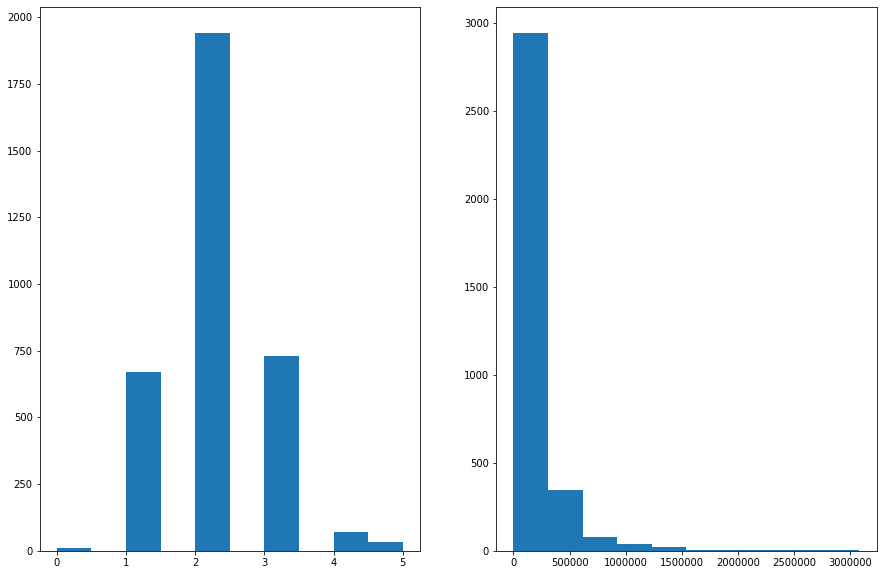

In [16]:
fig0, (ax1,ax2) = plt.subplots(1,2, figsize=(15,10))

ax1.hist(df["Room"])
ax2.ticklabel_format(useOffset=False, style='plain')

ax2.hist(df["Price(USD)"])
ax2.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [17]:
Parking = df['Parking'].value_counts()
print(Parking)
print(' ')

Warehouse = df['Warehouse'].value_counts()
print(Warehouse)
print(' ')

Elevator = df['Elevator'].value_counts()
print(Elevator)


True     2925
False     527
Name: Parking, dtype: int64
 
True     3158
False     294
Name: Warehouse, dtype: int64
 
True     2717
False     735
Name: Elevator, dtype: int64


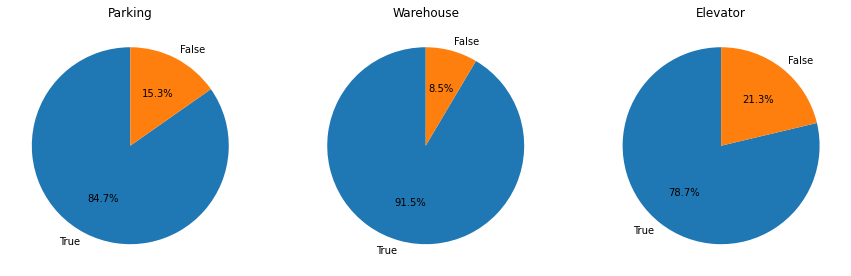

In [18]:
fig1, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,15)) 

labels = 'True', 'False'
ax1.pie([Parking[1], Parking[0]], labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.set_title("Parking")

labels = 'True', 'False'
ax2.pie([Warehouse[1], Warehouse[0]], labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax2.set_title("Warehouse")

labels = 'True', 'False'
ax3.pie([Elevator[1], Elevator[0]], labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax3.set_title("Elevator")

plt.show()

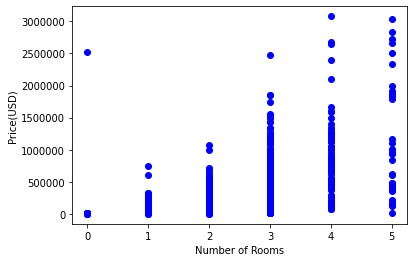

In [19]:
plt.scatter(df['Room'], df['Price(USD)'],  color='blue')
plt.xlabel("Number of Rooms")
plt.ylabel("Price(USD)")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

It looks like that the more expensive houses have more rooms which makes sense. But there is a very expensive house with no bedrooms lets check it out:

In [20]:
df[(df['Room']== 0) & (df['Price(USD)']> 2000000)]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3107,630,0,False,False,False,Tajrish,"75,600,000,000","2,520,000"


Well, it's a large house in uptown, so it makes sense to me that it is expensive, but the weird thing is that a place this big has no bedrooms and not even a warehouse !! I think it's an outlier. Let's check the other houses at the same address:

In [21]:
df[df['Address']== 'Tajrish']

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
355,110,2,True,True,True,Tajrish,"6,600,000,000","220,000"
1148,115,2,True,True,True,Tajrish,"8,200,000,000","273,333"
2584,300,4,True,True,True,Tajrish,"9,000,000,000","300,000"
2769,100,2,True,True,True,Tajrish,"5,700,000,000","190,000"
2831,100,2,True,True,True,Tajrish,"5,700,000,000","190,000"
3096,150,3,True,True,True,Tajrish,"12,750,000,000","425,000"
3107,630,0,False,False,False,Tajrish,"75,600,000,000","2,520,000"


Well seems an outlier to me! Maybe the data for the warehouse or number of rooms is wrong, or it's just land and not an apartment. But since we don't have access to the data source to check it out and the price makes sense based on the area, I'm not going to drop it from the dataset.

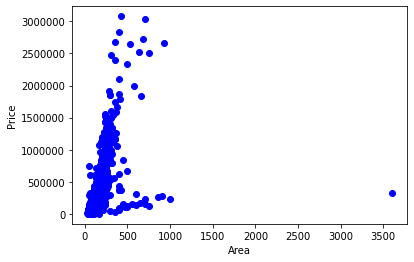

In [22]:
plt.scatter(df['Area'], df['Price(USD)'],  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

As we see in the scatterplot, the price rises as the area go up, which of course, is reasonable. I think we have another outlier here, the blue point on the right side of the plot has a great area, but it's not much expensive; let's check it out:

In [23]:
df[df['Area']>3500]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
2171,"3,600",2,False,False,False,Shahryar,"9,720,000,000","324,000"


The place is in the suburb of Tehran, so the price makes sense.The address of a place is an essential factor that affects the price, so let's check how many unique addresses we have and which ones are repeated more in our dataset.

In [24]:
print(df['Address'].value_counts().shape)
df['Address'].value_counts()

(192,)


Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                140
Shahran                   130
                         ... 
Chardangeh                  1
Mehrabad                    1
Pakdasht KhatunAbad         1
Kazemabad                   1
Yakhchiabad                 1
Name: Address, Length: 192, dtype: int64

In [25]:
df.sort_values(by='Price', ascending=False).head(9)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1707,420,4,True,True,True,Zaferanieh,"92,400,000,000","3,080,000"
1810,705,5,True,True,False,Abazar,"91,000,000,000","3,033,333"
430,400,5,True,True,False,Lavasan,"85,000,000,000","2,833,333"
819,680,5,True,True,False,Ekhtiarieh,"81,600,000,000","2,720,000"
1332,350,4,True,True,True,Niavaran,"80,500,000,000","2,683,333"
1694,929,5,True,True,False,Zafar,"80,000,000,000","2,666,667"
3051,530,4,True,True,True,Dorous,"79,500,000,000","2,650,000"
3107,630,0,False,False,False,Tajrish,"75,600,000,000","2,520,000"
831,750,5,True,True,True,Mahmoudieh,"75,000,000,000","2,500,000"


# Training Price Prediction Models

Now that we explored our data and have come to a better comprehension of the dataset's characteristics, it's time to train some model for price prediction. First, I will use linear Regression, and then I will use the KNN regressor and compare these two models.

## Regression

In order to use regression, we need to transform our categorical Data into numerical ones:

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 

df2 = df

for i in df2.columns: 
    if df2[i].dtype == 'object':
        encoder.fit_transform(list(df2[i].values))
        df2[i] = encoder.transform(df2[i].values)
        

In [27]:
df2.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,156,"1,850,000,000","61,667"
1,60,1,True,True,True,156,"1,850,000,000","61,667"
2,79,2,True,True,True,117,"550,000,000","18,333"
3,95,2,True,True,True,152,"902,500,000","30,083"
4,123,2,True,True,True,150,"7,000,000,000","233,333"
5,70,2,True,True,False,106,"2,050,000,000","68,333"
6,87,2,True,True,True,117,"600,000,000","20,000"
7,59,1,True,True,True,156,"2,150,000,000","71,667"
8,54,2,True,True,False,13,"493,000,000","16,433"
9,71,1,True,True,True,183,"2,370,000,000","79,000"


Let's define our independent variables and our Response variable:

In [28]:
X = np.asanyarray(df[['Area','Room','Parking','Warehouse','Elevator','Address']])
# X = np.asanyarray(df[['Area','Room']])
# X = np.asanyarray(df[['Area']])
# X = np.asanyarray(df[['Address']])
y = np.asanyarray(df[['Price(USD)']])

Splitting the dataset into train and test sets:

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2761, 6) (2761, 1)
Test set: (691, 6) (691, 1)


Fitting a Linear Regression Model:

In [30]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression()

In [31]:
print ('Coefficients: ', lrmodel.coef_)
print ('Intercept: ',lrmodel.intercept_)

Coefficients:  [[ 2.16382422e+03  5.68748998e+04 -3.85530222e+03  3.14619432e+04
   3.74209355e+04  5.05460728e+01]]
Intercept:  [-233453.83029588]


Prediction for the test set:

In [32]:
predictions = lrmodel.predict(X_test)

Evaluation of the model:

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE : {mean_squared_error(predictions, y_test)}")
print("R2-score: %.2f" % r2_score(y_test , predictions))

MSE : 113957039622.36102
R2-score: -0.24


We got a negative R2 score!! Which means the model can be arbitrarily worse. So the linear regression model doesn't seem to work for this data!! Now let's try our chance with KNN Regressor:

## KNN
In order to use KNN, we need to transform our categorical Data into numerical ones; we also change the boolean (True, False) to integer and the integers to floats:

In [34]:
df2 = df

for i in df2.columns: 
    if df2[i].dtype == 'object':
        encoder.fit_transform(list(df2[i].values))
        df2[i] = encoder.transform(df2[i].values)
        
for j in df2.columns: 
    if df2[j].dtype == 'bool':
        df2[j] = df2[j].astype('int64')
                
for k in df2.columns: 
    if df2[k].dtype == 'int':
        df2[k] = df2[k].astype('float64')

Now, as you see in the df2, we will only be dealing with numbers.

In [35]:
df2.head(9)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,156,"1,850,000,000","61,667"
1,60,1,1,1,1,156,"1,850,000,000","61,667"
2,79,2,1,1,1,117,"550,000,000","18,333"
3,95,2,1,1,1,152,"902,500,000","30,083"
4,123,2,1,1,1,150,"7,000,000,000","233,333"
5,70,2,1,1,0,106,"2,050,000,000","68,333"
6,87,2,1,1,1,117,"600,000,000","20,000"
7,59,1,1,1,1,156,"2,150,000,000","71,667"
8,54,2,1,1,0,13,"493,000,000","16,433"


Let's define our independent variables and our Response variable:

In [36]:
X = df2[['Area', 'Room', 'Warehouse', 'Elevator', 'Address']].values
print(X [0:5])

y = df2[['Price(USD)']].values
print(y [0:5])

[[ 63.   1.   1.   1. 156.]
 [ 60.   1.   1.   1. 156.]
 [ 79.   2.   1.   1. 117.]
 [ 95.   2.   1.   1. 152.]
 [123.   2.   1.   1. 150.]]
[[ 61666.67]
 [ 61666.67]
 [ 18333.33]
 [ 30083.33]
 [233333.33]]


Since we use KNN and it calculates the distance between our data points, the scales are so different; for example, compare the scale of the column Area and the column Rooms!

For the model to work better, we scale our data using the normal distribution:

In [39]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

Scaler = preprocessing.StandardScaler().fit(X)
X = Scaler.transform(X.astype(float))
X[0:5]

array([[-0.48735338, -1.42272564,  0.30511784,  0.52011437,  1.01359766],
       [-0.51970843, -1.42272564,  0.30511784,  0.52011437,  1.01359766],
       [-0.31479312, -0.10674255,  0.30511784,  0.52011437,  0.23860802],
       [-0.14223287, -0.10674255,  0.30511784,  0.52011437,  0.93411154],
       [ 0.15974758, -0.10674255,  0.30511784,  0.52011437,  0.89436848]])

Splitting the dataset into train and test sets:

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2761, 5) (2761, 1)
Test set: (691, 5) (691, 1)


Fitting a KNN Model with K=3:

In [41]:
from sklearn.neighbors import KNeighborsRegressor
k = 3  
knnr = KNeighborsRegressor(n_neighbors = k).fit(X_train,y_train)
knnr

KNeighborsRegressor(n_neighbors=3)

Prediction for the test set:

In [42]:
yhat = knnr.predict(X_test)
yhat[0:5]

array([[128666.66666667],
       [145555.55666667],
       [118111.11333333],
       [ 90666.66666667],
       [ 92777.77666667]])

Evaluation of the model:

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE : {mean_squared_error(yhat, y_test)}")
print("R2-score: %.2f" % r2_score(y_test , yhat))

MSE : 23791661118.96873
R2-score: 0.74


We considered the K equal to 3 but is that the best K? let's find out:

In [44]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    knnr = KNeighborsRegressor(n_neighbors = n).fit(X_train,y_train)
    yhat = knnr.predict(X_test)
    mean_acc[n-1] = r2_score(y_test , yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    

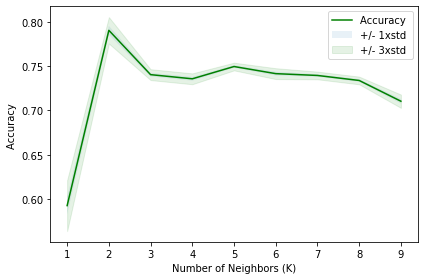

The best accuracy was with 0.7903831981785352 with k= 2


In [45]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

We got almost 80 Percent accuracy (it can be slightly different with another test and train sets), which is excellent compared to the linear regression model.